# Nettoyage des fichiers

## Lecture des tables

In [1]:
# pip install statsmodels
# pip install seaborn

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import kendalltau
from scipy.stats import pearsonr
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
import scipy.stats as stats
from statsmodels.tsa.arima.model import ARIMA

In [3]:
os.chdir(r"C:\Users\jbfal\OneDrive\Bureau\Open Classrooms\Formation\Projet 6 (18.09.2023)\BDD")

In [4]:
clients = pd.read_csv("customers.csv", sep = ";")
produits = pd.read_csv("products.csv", sep = ";")
transactions = pd.read_csv("Transactions.csv", sep = ";")

In [5]:
clients.head(2)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975


In [6]:
produits.head(2)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0


In [7]:
transactions.head(2)

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664


## FICHIER CLIENTS

In [8]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [9]:
print(clients.isnull().sum())

client_id    0
sex          0
birth        0
dtype: int64


In [10]:
clients.loc[clients["client_id"].duplicated(keep = False),:]

,client_id,sex,birth


##  FICHIER PRODUITS

In [11]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [12]:
print(produits.isnull().sum())

id_prod    0
price      0
categ      0
dtype: int64


In [13]:
produits.loc[produits["id_prod"].duplicated(keep = False),:]

,id_prod,price,categ


In [14]:
print(produits.loc[produits["price"] < 0])

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []


In [15]:
print(produits.nlargest(10, "price"))

     id_prod   price  categ
946      2_2  300.00      2
724     2_76  254.44      2
394    2_158  247.22      2
1435   2_167  236.99      2
2778    2_30  233.54      2
1959   2_125  231.99      2
2486   2_166  230.04      2
785     2_40  228.11      2
10     2_228  225.17      2
1895     2_4  222.97      2


## FICHIER TRANSACTIONS

In [16]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 21.0+ MB


In [17]:
print(transactions.isnull().sum())

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


# Les fusions

## FUSION_1 (transactions + produits)

In [18]:
fusion_1 = transactions.merge(produits, on = "id_prod", how = "outer", indicator = True)

In [19]:
fusion_1[fusion_1["_merge"]!= "both"]

,id_prod,date,session_id,client_id,price,categ,_merge
687534,0_1016,NaN,NaN,NaN,35.06,0,right_only
687535,0_1780,NaN,NaN,NaN,1.67,0,right_only
687536,0_1062,NaN,NaN,NaN,20.08,0,right_only
687537,0_1119,NaN,NaN,NaN,2.99,0,right_only
687538,0_1014,NaN,NaN,NaN,1.15,0,right_only
687539,1_0,NaN,NaN,NaN,31.82,1,right_only
687540,0_1318,NaN,NaN,NaN,20.92,0,right_only
687541,0_1800,NaN,NaN,NaN,22.05,0,right_only
687542,0_1645,NaN,NaN,NaN,2.99,0,right_only
687543,0_322,NaN,NaN,NaN,2.99,0,right_only


In [20]:
fusion_1.drop(["_merge"], axis = 1, inplace = True)

In [21]:
fusion_1.shape

(687555, 6)

In [22]:
fusion_1.head()

,id_prod,date,session_id,client_id,price,categ
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0
1,0_1259,2021-03-01 10:27:10.675023,s_202,c_1599,11.99,0
2,0_1259,2021-03-04 07:26:01.343183,s_1519,c_1609,11.99,0
3,0_1259,2021-03-05 13:32:43.907997,s_2114,c_107,11.99,0
4,0_1259,2021-03-07 09:47:05.272864,s_2976,c_4215,11.99,0


## FUSION_2 (fusion_1 + clients)

In [23]:
fusion_2 = fusion_1.merge(clients, on = "client_id", how = "outer", indicator = True)

In [24]:
fusion_2[fusion_2["_merge"]!= "both"]

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge
687534,0_1016,NaN,NaN,NaN,35.06,0.0,NaN,NaN,left_only
687535,0_1780,NaN,NaN,NaN,1.67,0.0,NaN,NaN,left_only
687536,0_1062,NaN,NaN,NaN,20.08,0.0,NaN,NaN,left_only
687537,0_1119,NaN,NaN,NaN,2.99,0.0,NaN,NaN,left_only
687538,0_1014,NaN,NaN,NaN,1.15,0.0,NaN,NaN,left_only
687539,1_0,NaN,NaN,NaN,31.82,1.0,NaN,NaN,left_only
687540,0_1318,NaN,NaN,NaN,20.92,0.0,NaN,NaN,left_only
687541,0_1800,NaN,NaN,NaN,22.05,0.0,NaN,NaN,left_only
687542,0_1645,NaN,NaN,NaN,2.99,0.0,NaN,NaN,left_only
687543,0_322,NaN,NaN,NaN,2.99,0.0,NaN,NaN,left_only


In [25]:
masque = (fusion_2["_merge"] != "right_only") & (fusion_2["_merge"] != "left_only")
produits_clients_invendus = fusion_2[ ~ masque]
fusion_2 = fusion_2[masque]

In [26]:
fusion_2.shape

(687534, 9)

In [27]:
fusion_2.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0,f,1967.0,both
1,0_1259,2022-10-01 00:01:07.843138,s_275943,c_329,11.99,0.0,f,1967.0,both
2,0_1259,2022-12-01 00:01:07.843138,s_305291,c_329,11.99,0.0,f,1967.0,both
3,0_1259,2023-01-01 00:01:07.843138,s_320153,c_329,11.99,0.0,f,1967.0,both
4,1_397,2021-11-23 18:21:56.361813,s_123998,c_329,18.99,1.0,f,1967.0,both


In [28]:
fusion_2.drop(["_merge"], axis = 1, inplace = True)

### Problème de format des dates

In [29]:
fusion_2["date"] = pd.to_datetime(fusion_2["date"], format = "%Y-%m-%d %H:%M:%S.%f", errors = "coerce")

In [30]:
print(fusion_2["date"])

0        2021-03-01 00:01:07.843138
1        2022-10-01 00:01:07.843138
2        2022-12-01 00:01:07.843138
3        2023-01-01 00:01:07.843138
4        2021-11-23 18:21:56.361813
                    ...            
687529   2022-08-28 16:51:07.389515
687530   2022-10-28 16:51:07.389515
687531   2021-12-18 20:54:25.725059
687532   2022-10-18 20:54:25.725059
687533   2021-09-15 19:42:08.596375
Name: date, Length: 687534, dtype: datetime64[ns]


# Réponse à Antoine

## Analyse du chiffre d'affaires

### Analyse de la saisonnalité

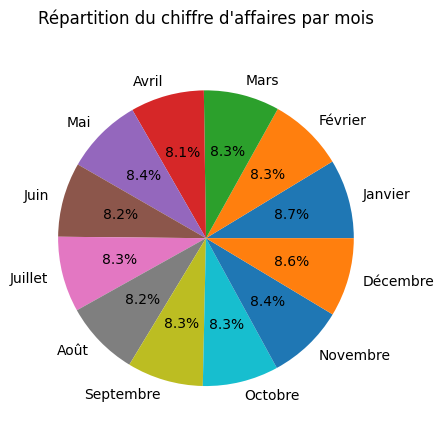

In [31]:
fusion_2["mois"] = fusion_2["date"].dt.month
ventes_mensu = fusion_2.groupby("mois")["price"].sum()
etiquettes_mois = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]
plt.pie(ventes_mensu, labels = etiquettes_mois, autopct = "%1.1f%%")
plt.title("Répartition du chiffre d\'affaires par mois\n")
plt.show()

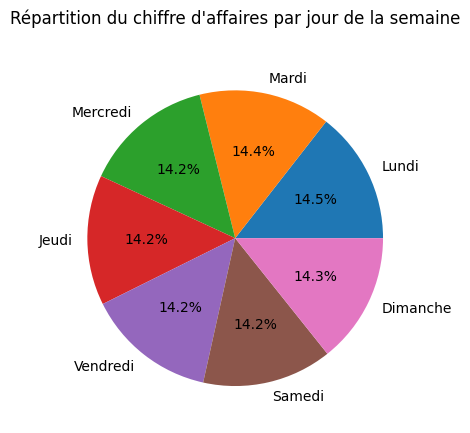

In [32]:
fusion_2["jour"] = fusion_2["date"].dt.isocalendar().day
total_des_ventes = fusion_2["price"].sum()
pourcentage_vente_quoti = (fusion_2.groupby("jour")["price"].sum() / total_des_ventes) * 100
etiquettes_jour = ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]
plt.pie(pourcentage_vente_quoti, labels = etiquettes_jour, autopct = "%1.1f%%")
plt.title("Répartition du chiffre d\'affaires par jour de la semaine\n")
plt.show()

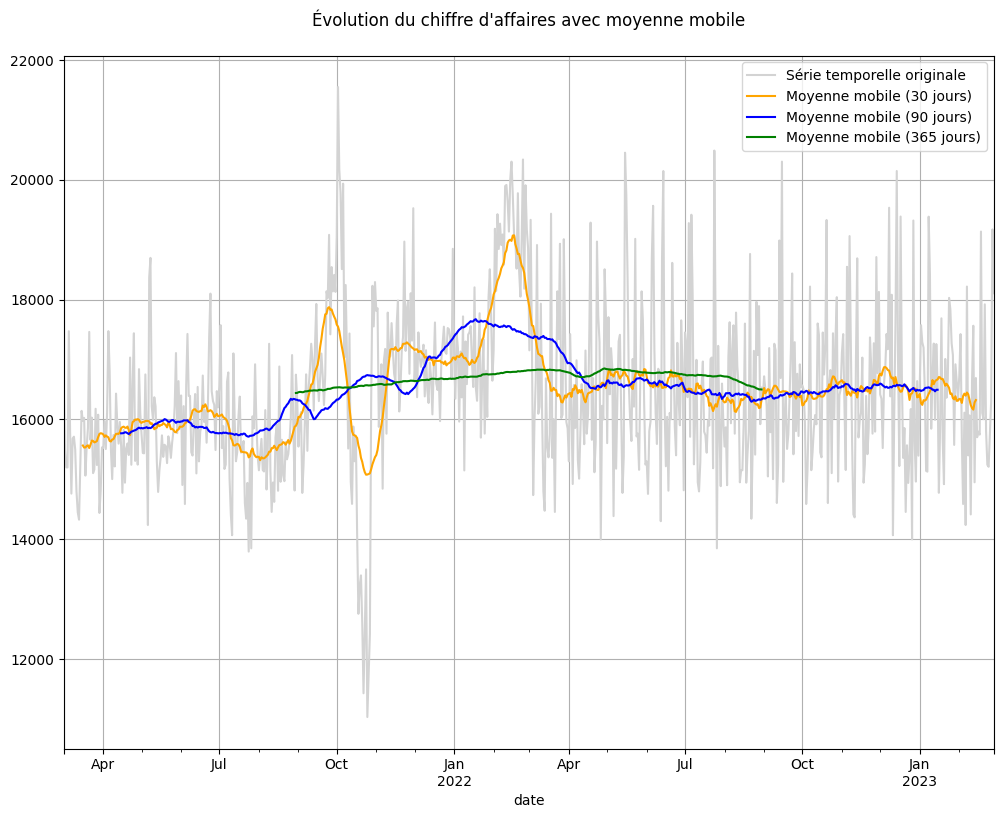

In [33]:
ventes_serie_temp = fusion_2.resample("D", on = "date")["price"].sum().rename("chiffre_d_affaires")
ventes_serie_temp_2 = pd.DataFrame(ventes_serie_temp["2021":"2023"], columns = ["chiffre_d_affaires"])
plt.figure(figsize=(12, 9))
ventes_serie_temp_2["chiffre_d_affaires"].plot(color = "lightgrey", label = "Série temporelle originale")
ventes_serie_temp_2["chiffre_d_affaires"].rolling(window = 30, center = True).mean().plot(color = "orange", label = "Moyenne mobile (30 jours)")
ventes_serie_temp_2["chiffre_d_affaires"].rolling(window = 90, center = True).mean().plot(color = "blue", label = "Moyenne mobile (90 jours)")
ventes_serie_temp_2["chiffre_d_affaires"].rolling(window = 365, center = True).mean().plot(color = "green", label = "Moyenne mobile (365 jours)")
plt.title("Évolution du chiffre d\'affaires avec moyenne mobile\n")
plt.grid(True)
plt.legend()
plt.show()

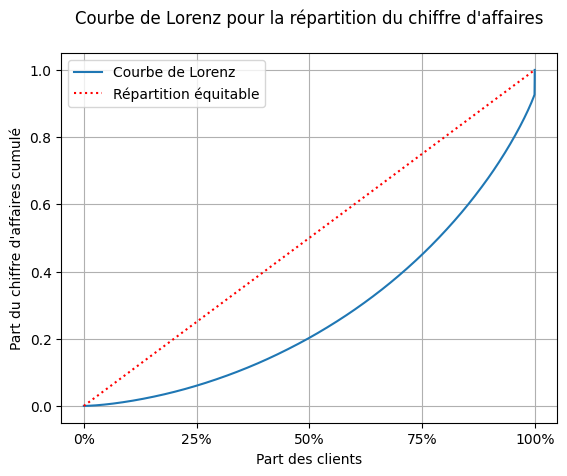

In [34]:
revenu_par_client = fusion_2.groupby("client_id")["price"].sum().sort_values(ascending = True)
revenu_par_client_classe = revenu_par_client.sort_values(ascending = False)
revenu_final_lorenz = revenu_par_client.cumsum() / revenu_par_client_classe.sum()
x = np.linspace(0,1,len(revenu_final_lorenz))
plt.plot(x, revenu_final_lorenz, label = "Courbe de Lorenz")
plt.plot(x, x, linestyle = ":", color = "red", label = "Répartition équitable")
plt.xlabel("Part des clients")
xticks_values = [0, 0.25, 0.5, 0.75, 1.0]
plt.xticks(xticks_values, ["0%", "25%", "50%", "75%", "100%"])
plt.ylabel("Part du chiffre d\'affaires cumulé")
plt.title("Courbe de Lorenz pour la répartition du chiffre d\'affaires\n")
plt.grid(True)
plt.legend()
plt.show()

## Analyse des produits

### Top 10 produits (par chiffre d'affaires)

In [35]:
ventes_produits = (fusion_2.groupby("id_prod")["session_id"].count()
                    .reset_index(name = "total_sales"))
ventes_produits["chiffre_affaire"] = ventes_produits["total_sales"] * fusion_2.groupby("id_prod")["price"].first().values
ventes_produits.sort_values(by = "chiffre_affaire", ascending = False).head(10)

,id_prod,total_sales,chiffre_affaire
3096,2_159,650,94893.50
3070,2_135,1005,69334.95
3045,2_112,968,65407.76
3034,2_102,1027,60736.78
3152,2_209,814,56971.86
2619,1_395,1953,56617.47
2591,1_369,2340,56136.60
3043,2_110,865,53846.25
2607,1_383,1857,53834.43
2641,1_414,2246,53522.18


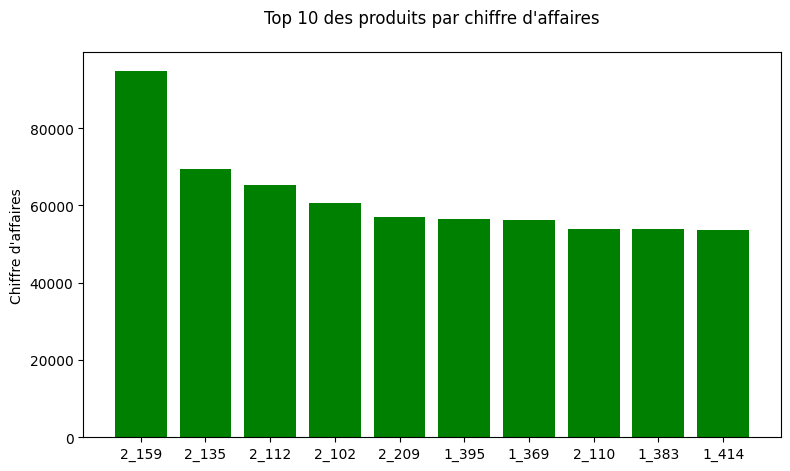

In [36]:
top_produits_chiffre_affaire = ventes_produits.sort_values(by = "chiffre_affaire", ascending = False).head(10)
plt.figure(figsize = (9, 5))
plt.bar(top_produits_chiffre_affaire["id_prod"], top_produits_chiffre_affaire["chiffre_affaire"], color = "green")
plt.ylabel("Chiffre d'affaires")
plt.title("Top 10 des produits par chiffre d'affaires\n")
plt.show()

### Top 10 produits (par nombre de ventes)

In [37]:
ventes_produits.sort_values(by = "total_sales", ascending = False).head(10)

,id_prod,total_sales,chiffre_affaire
2591,1_369,2340,56136.60
2644,1_417,2269,47626.31
2641,1_414,2246,53522.18
2733,1_498,2202,51460.74
2653,1_425,2163,36749.37
2629,1_403,2040,36699.60
2640,1_413,2036,36627.64
2639,1_412,2014,33533.10
2632,1_406,2003,49694.43
2633,1_407,2001,31995.99


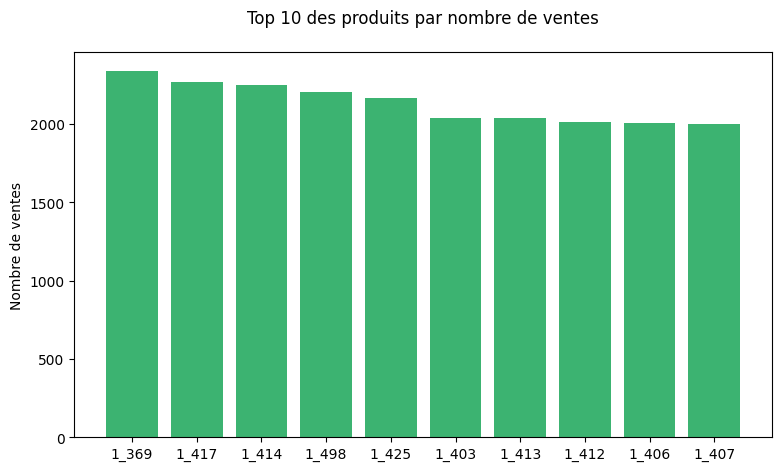

In [38]:
top_produits_nombre_ventes = ventes_produits.sort_values(by = "total_sales", ascending = False).head(10)
plt.figure(figsize = (9, 5))
plt.bar(top_produits_nombre_ventes["id_prod"], top_produits_nombre_ventes["total_sales"], color = "mediumseagreen")
plt.ylabel("Nombre de ventes")
plt.title("Top 10 des produits par nombre de ventes\n")
plt.show()

### Flop 10 produits

In [39]:
ventes_produits.sort_values(by = "chiffre_affaire", ascending = True).head(10)

,id_prod,total_sales,chiffre_affaire
595,0_1539,1,0.99
313,0_1284,1,1.38
719,0_1653,2,1.98
1784,0_541,1,1.99
665,0_1601,1,1.99
2079,0_807,1,1.99
802,0_1728,1,2.27
549,0_1498,1,2.48
2179,0_898,2,2.54
925,0_1840,2,2.56


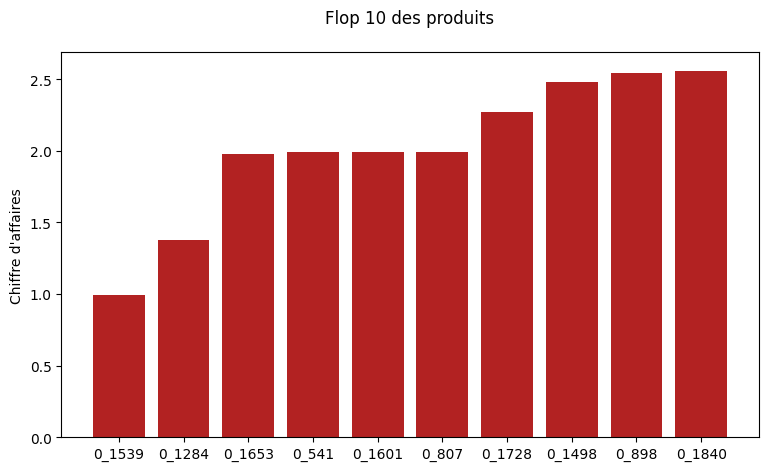

In [40]:
flop_produits = ventes_produits.sort_values(by = "chiffre_affaire", ascending = True).head(10)
plt.figure(figsize = (9, 5))
plt.bar(flop_produits["id_prod"], flop_produits["chiffre_affaire"], color = "firebrick")
plt.ylabel("Chiffre d'affaires")
plt.title("Flop 10 des produits\n")
plt.show()

### Par catégorie de produit

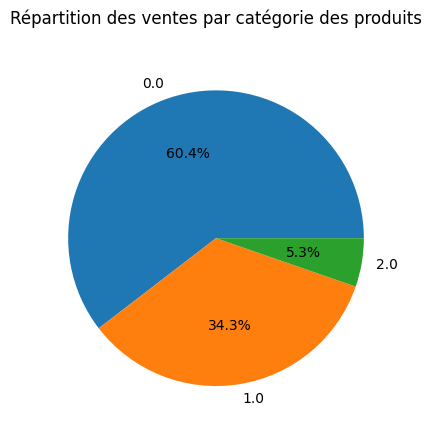

In [41]:
repartition_par_categorie = fusion_2.groupby("categ").size().reset_index(name = "nombre_produits")
nombre_total_produits = repartition_par_categorie["nombre_produits"].sum()
repartition_par_categorie["pourcentage"] = ((repartition_par_categorie["nombre_produits"] / nombre_total_produits) * 100)
plt.pie(repartition_par_categorie["nombre_produits"], labels = repartition_par_categorie["categ"], autopct = "%1.1f%%")
plt.title("Répartition des ventes par catégorie des produits\n")
plt.show()

In [42]:
prices = fusion_2["price"]
moyenne_prix = np.mean(prices)

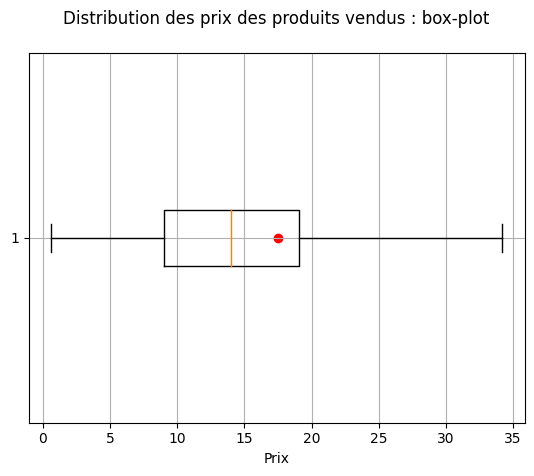

La moyenne des prix est 17.49 €.
La médiane des prix est 14.0 €.


In [43]:
plt.boxplot(fusion_2["price"], vert = False, showfliers = False)
plt.scatter(moyenne_prix, 1, color = "red", marker = "o")
plt.title("Distribution des prix des produits vendus : box-plot\n")
plt.xlabel("Prix")
plt.grid(True)
plt.show()
print(f"La moyenne des prix est {fusion_2['price'].mean():.2f} €.")
print(f"La médiane des prix est {fusion_2['price'].median():.1f} €.")

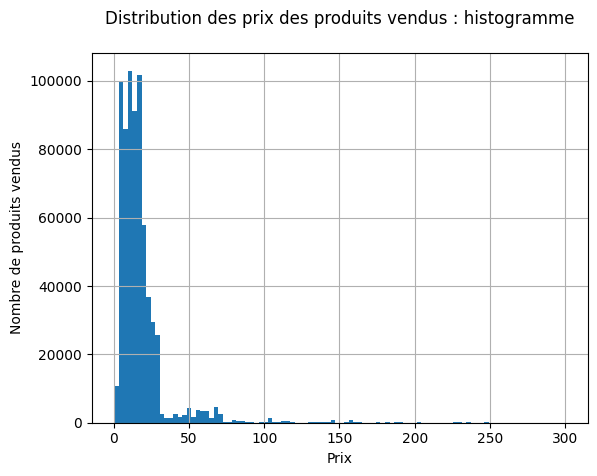

Nos produits ont 1442 prix différents.


In [44]:
plt.hist(fusion_2["price"], bins = 100)
plt.xlabel("Prix")
plt.ylabel("Nombre de produits vendus")
plt.title("Distribution des prix des produits vendus : histogramme\n")
plt.grid(True)
plt.show()
print(f"Nos produits ont {len(fusion_2['price'].value_counts())} prix différents.")

### Problème des clients professionnels

In [45]:
nombre_de_clients_differents = fusion_2["client_id"].nunique()
print(f"Sur notre site, nous avons eu un total de {nombre_de_clients_differents} clients.")

Sur notre site, nous avons eu un total de 8600 clients.


In [46]:
top_clients = fusion_2.groupby("client_id")["price"].sum().reset_index().sort_values(by = "price", ascending=False)
top_clients.head(10)

,client_id,price
677,c_1609,326039.89
4388,c_4958,290227.03
6337,c_6714,153918.60
2724,c_3454,114110.57
634,c_1570,5285.82
2513,c_3263,5276.87
1268,c_2140,5260.18
2108,c_2899,5214.05
7006,c_7319,5155.77
7715,c_7959,5135.75


In [47]:
produit_nb_achats_par_client = fusion_2.groupby(["client_id", "id_prod"]).size().reset_index(name = "nombre_achats")
clients_plus_de_10_achats = produit_nb_achats_par_client[produit_nb_achats_par_client["nombre_achats"] > 10]
print(clients_plus_de_10_achats)

       client_id id_prod  nombre_achats
24501     c_1609     0_0             65
24502     c_1609     0_1             14
24504     c_1609  0_1000             22
24505     c_1609  0_1001             14
24506     c_1609  0_1002             33
...          ...     ...            ...
264534    c_7499  0_1543             14
275033     c_777  0_1481             15
290208    c_8125  0_1467             12
309740    c_8616  0_1619             11
314449     c_990  0_1446             11

[1305 rows x 3 columns]


In [48]:
clients_pro = fusion_2.merge(clients_plus_de_10_achats, on = ["client_id", "id_prod"])
print(clients_pro.head())

  id_prod                       date session_id client_id  price  categ sex  \
0  0_1390 2021-03-06 08:38:36.390395     s_2487    c_1609  19.37    0.0   m   
1  0_1390 2021-04-01 01:17:31.571857    s_14224    c_1609  19.37    0.0   m   
2  0_1390 2021-04-07 03:53:02.124370    s_17087    c_1609  19.37    0.0   m   
3  0_1390 2021-04-19 03:30:06.420633    s_22584    c_1609  19.37    0.0   m   
4  0_1390 2021-04-20 07:50:29.261987    s_23114    c_1609  19.37    0.0   m   

    birth  mois  jour  nombre_achats  
0  1980.0   3.0     6             46  
1  1980.0   4.0     4             46  
2  1980.0   4.0     3             46  
3  1980.0   4.0     1             46  
4  1980.0   4.0     2             46  


In [49]:
fusion_2 = fusion_2[ ~ fusion_2["client_id"].isin(clients_plus_de_10_achats["client_id"])]

### Distribution de la dépense par client (hors clients professionnels)

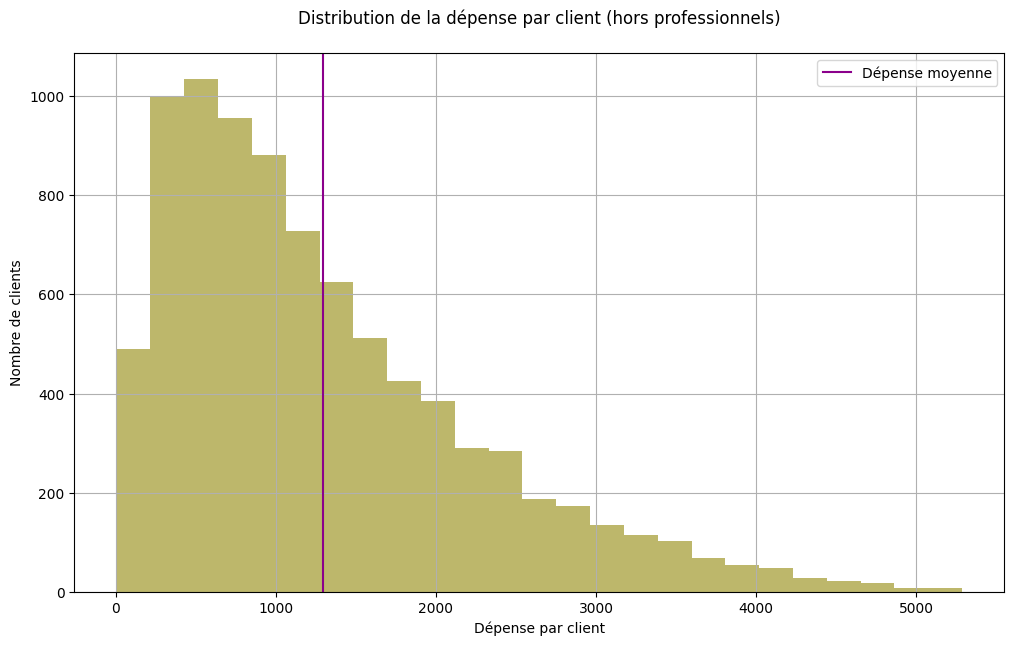

Dépense moyenne par client (hors professionnels) : 1294.35


In [50]:
depenses_par_client = fusion_2.groupby("client_id")["price"].sum()
depense_moyenne_par_client = depenses_par_client.mean()
plt.figure(figsize = (12, 7))
plt.hist(depenses_par_client, bins = 25, color = "darkkhaki")
plt.axvline(depense_moyenne_par_client, color = "darkmagenta", label = "Dépense moyenne")
plt.xlabel("Dépense par client")
plt.ylabel("Nombre de clients")
plt.title("Distribution de la dépense par client (hors professionnels)\n")
plt.grid(True)
plt.legend()
plt.show()

print(f"Dépense moyenne par client (hors professionnels) : {depense_moyenne_par_client:.2f}")

## Segmentation des clients

### Selon leur genre

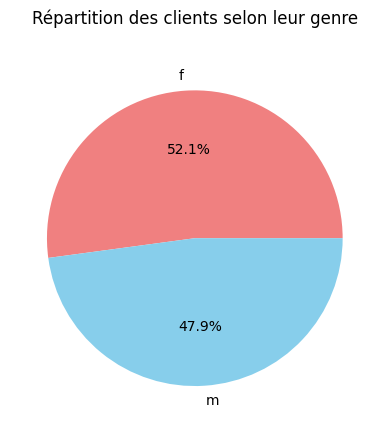

In [51]:
sex_count = fusion_2["sex"].value_counts()
plt.pie(sex_count, labels = sex_count.index, autopct = "%1.1f%%", colors = ["lightcoral", "skyblue"])
plt.title("Répartition des clients selon leur genre\n")
plt.show()

### Test de Student...

In [52]:
print("Hypothèses du test de Student :\n")
print("Hypothèse nulle : Pas de différence significative entre les moyennes des achats effectués par les hommes et les femmes.\n") 
print("Hypothèse alternative : Il y a une différence significative entre les moyennes des achats des hommes et des femmes .\n")

Hypothèses du test de Student :

Hypothèse nulle : Pas de différence significative entre les moyennes des achats effectués par les hommes et les femmes.

Hypothèse alternative : Il y a une différence significative entre les moyennes des achats des hommes et des femmes .



### ... approprié ou non ?

In [53]:
print("Hypothèses du test de Levene :\n")
print("Hypothèse nulle :  les variances des prix pour les hommes et les femmes sont égales, ce qui indique une homogénéité des variances entre les groupes.\n") 
print("Hypothèse alternative : Au moins une des variances est significativement différente, ce qui indique une hétérogénéité des variances entre les groupes.\n\n")

hommes = fusion_2[fusion_2["sex"] == "m"]["price"]
femmes = fusion_2[fusion_2["sex"] == "f"]["price"]

statistique_levene, p_value_levene = levene(hommes, femmes)

print(f"Test de Levene : {statistique_levene}\n")
print(f"p-value : {p_value_levene}\n")

if p_value_levene > 0.05:
    print("L'homogénéité des variances est satisfaite.")
else:
    print("L'homogénéité des variances n'est pas satisfaite.")

Hypothèses du test de Levene :

Hypothèse nulle :  les variances des prix pour les hommes et les femmes sont égales, ce qui indique une homogénéité des variances entre les groupes.

Hypothèse alternative : Au moins une des variances est significativement différente, ce qui indique une hétérogénéité des variances entre les groupes.


Test de Levene : 2.385845268829316

p-value : 0.12243914599423347

L'homogénéité des variances est satisfaite.


In [54]:
print("Hypothèses du test d'Anderson-Darling :\n")
print("Hypothèse nulle :  Les données liées aux prix suivent une distribution normale.\n") 
print("Hypothèse alternative : Les données liées aux prix suivent une distribution anormale.\n\n")

prix_test_normalite = fusion_2["price"]

statistique_test_AD_prix, valeurs_critiques_prix, niveaux_de_signification_prix = stats.anderson(prix_test_normalite, dist = 'norm')
niveau_signification = 0.05

if statistique_test_AD_prix < valeurs_critiques_prix[niveaux_de_signification_prix == niveau_signification].any():
    print("Les données relatives aux prix suivent une distribution normale.")
else:
    print("Les données relatives aux prix ne suivent pas une distribution normale.")

Hypothèses du test d'Anderson-Darling :

Hypothèse nulle :  Les données liées aux prix suivent une distribution normale.

Hypothèse alternative : Les données liées aux prix suivent une distribution anormale.


Les données relatives aux prix ne suivent pas une distribution normale.


In [55]:
print("Pas de test de Student possible ici, il faudrait mieux faire un test non paramétrique.")

Pas de test de Student possible ici, il faudrait mieux faire un test non paramétrique.


In [56]:
print("Hypothèses du test de Mann-Whitney :\n")
print("Hypothèse nulle :  Les médianes des deux échantillons sont égales, donc il n'y a pas de différence significative entre les distributions des deux échantillons.\n") 
print("Hypothèse alternative : La médiane des achats des hommes est significativement plus élevée que celle des femmes, donc l'échantillon masculin présente des valeurs plus élevées que l'échantillon féminin (même s'il est inférieur en nombre).\n\n")


statistique_MW, p_value_MW = mannwhitneyu(hommes, femmes, alternative = "greater")

print(f"Statistique du test de Mann-Whitney : {statistique_MW}\n")
print(f"p-value : {p_value_MW}\n")

if p_value_MW < 0.05:
    print("Il y a une différence significative entre les distributions des achats des hommes et des femmes.")
    
    stat_mediane, p_value_mediane, mediane_h, mediane_f = median_test(hommes, femmes)
    if p_value_mediane < 0.05:
        if mediane_h > mediane_f:
            print("La médiane des achats des hommes est significativement plus élevée que celle des femmes.")
        else:
            print("La médiane des achats des femmes est significativement plus élevée que celle des hommes.")
    else:
        print("Aucune conclusion significative sur la différence des médianes.")
else:
    print("Il n'y a pas de différence significative entre les distributions des achats des hommes et des femmes.")

Hypothèses du test de Mann-Whitney :

Hypothèse nulle :  Les médianes des deux échantillons sont égales, donc il n'y a pas de différence significative entre les distributions des deux échantillons.

Hypothèse alternative : La médiane des achats des hommes est significativement plus élevée que celle des femmes, donc l'échantillon masculin présente des valeurs plus élevées que l'échantillon féminin (même s'il est inférieur en nombre).


Statistique du test de Mann-Whitney : 50719464242.0

p-value : 0.9570252008104714

Il n'y a pas de différence significative entre les distributions des achats des hommes et des femmes.


### Selon leur âge

In [57]:
age = pd.Timestamp.now().year - fusion_2["birth"]
fusion_2["age"] = age

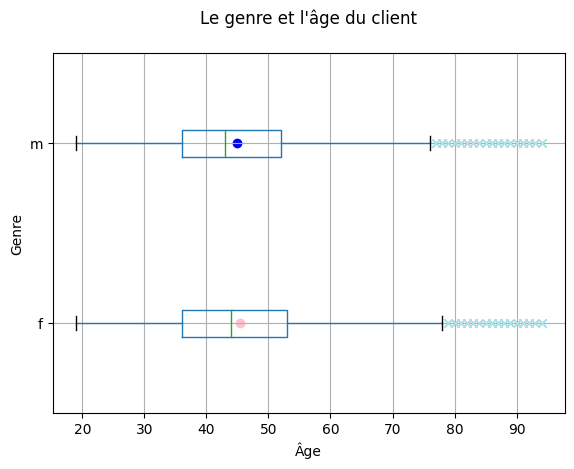

La moyenne d'âge des hommes est de 44.9 ans.
La moyenne d'âge des femmes est de 45.5 ans.

La moyenne d'âge de nos clients est de 45.2 ans.


In [58]:
fusion_2.boxplot(column = "age", by = "sex", vert = False, flierprops = {"marker": "x", "markerfacecolor": "powderblue", "markeredgecolor": "powderblue"})
moyenne_age_hommes = fusion_2.loc[fusion_2["sex"] == "m", "age"].mean()
moyenne_age_femme = fusion_2.loc[fusion_2["sex"] == "f", "age"].mean()
plt.scatter(moyenne_age_hommes, 2, color = "blue", marker = "o")
plt.scatter(moyenne_age_femme, 1, color = "pink", marker = "o")
plt.xlabel("Âge")
plt.ylabel("Genre")
plt.title("Le genre et l\'âge du client\n")
plt.suptitle("")
plt.show()

print(f"La moyenne d'âge des hommes est de {moyenne_age_hommes:.1f} ans.")
print(f"La moyenne d'âge des femmes est de {moyenne_age_femme:.1f} ans.\n")
print(f"La moyenne d'âge de nos clients est de {fusion_2['age'].mean():.1f} ans.")

In [59]:
print("Hypothèses du test de Shapiro :\n")
print("Hypothèse nulle :  Les données liées aux âges suivent une distribution normale.\n") 
print("Hypothèse alternative : Les données liées aux âges suivent une distribution anormale.\n\n")

age_test_normalite = fusion_2["age"]
statistique_shapiro, p_value_shapiro = shapiro(age_test_normalite)

print("Test de Shapiro :", statistique_shapiro, "\n")
print("p-value :", p_value_shapiro, "\n")

if p_value_shapiro > 0.05:
    print("Distribution normale des âges")
else:
    print("Distribution anormale des âges")

Hypothèses du test de Shapiro :

Hypothèse nulle :  Les données liées aux âges suivent une distribution normale.

Hypothèse alternative : Les données liées aux âges suivent une distribution anormale.


Test de Shapiro : 0.9719330668449402 

p-value : 0.0 

Distribution anormale des âges


C:\Users\jbfal\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


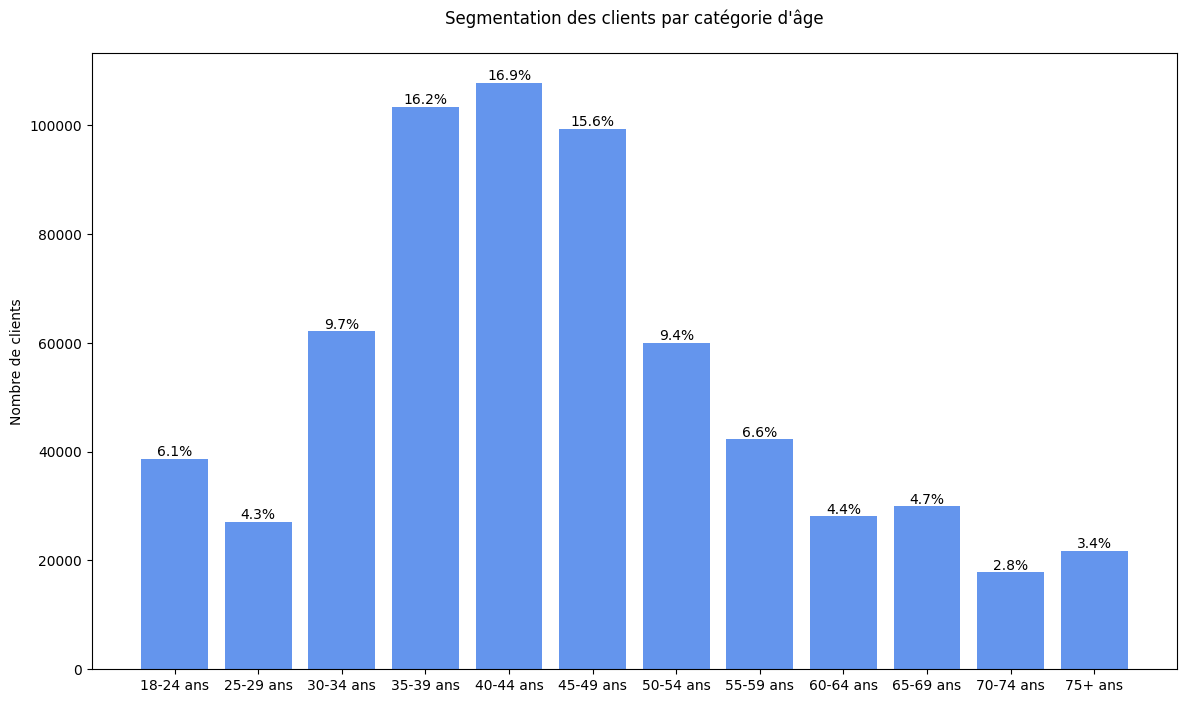

In [60]:
bins = [18, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 100]
labels = [
    "18-24 ans", "25-29 ans", "30-34 ans", "35-39 ans", "40-44 ans", "45-49 ans",
    "50-54 ans", "55-59 ans", "60-64 ans", "65-69 ans", "70-74 ans", "75+ ans"
]

fusion_2["categorie_age"] = pd.cut(fusion_2["age"], bins = bins, labels = labels)
count_categorie_age = fusion_2["categorie_age"].value_counts().sort_index()

total_clients = len(fusion_2)
pourcentages = (count_categorie_age / total_clients) * 100


plt.figure(figsize = (14, 8))
bars = plt.bar(count_categorie_age.index, count_categorie_age.values, color="cornflowerblue")
plt.ylabel("Nombre de clients")
plt.title("Segmentation des clients par catégorie d'âge\n")
for bar, pourcentage in zip(bars, pourcentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 5, f"{pourcentage:.1f}%",
        ha = "center", va = "bottom"
    )
plt.show()

In [61]:
recherche_cat = fusion_2.groupby("categ")["id_prod"].count().reset_index()
categorie_35_50 = recherche_cat.sort_values(by = "id_prod", ascending = False)
resultat_cat = categorie_35_50.iloc[0]["categ"]
print(f"La catégorie la plus consommée par les 35-50 ans est la catégorie {resultat_cat}.")

La catégorie la plus consommée par les 35-50 ans est la catégorie 0.0.


### Lien entre le genre des clients et les catégories de livres achetées

In [62]:
print("Hypothèses du test du Chi2 :\n")
print("Hypothèse nulle :  Les deux variables catégorielles sont indépendantes, donc il n'y a pas de corrélation entre ces deux variables.\n") 
print("Hypothèse alternative : Les deux variables catégorielles sont dépendantes, donc il existe une corrélation entre les deux.\n\n")

table_de_contingence_1 = pd.crosstab(fusion_2["sex"], fusion_2["categ"])
statistique_chi2, p_value_chi2, _, _ = chi2_contingency(table_de_contingence_1)

print(f"Test du Chi2 = {statistique_chi2}\n")
print(f"p-value = {p_value_chi2}\n")

if p_value_chi2 < 0.05:
     print("Il existe une corrélation entre le genre des clients et les catégories de livres achetées.")
else:
    print("Il n'y a pas de corrélation entre le genre des clients et les catégories de livres achetées.")

Hypothèses du test du Chi2 :

Hypothèse nulle :  Les deux variables catégorielles sont indépendantes, donc il n'y a pas de corrélation entre ces deux variables.

Hypothèse alternative : Les deux variables catégorielles sont dépendantes, donc il existe une corrélation entre les deux.


Test du Chi2 = 22.044126588940408

p-value = 1.6337241617026418e-05

Il existe une corrélation entre le genre des clients et les catégories de livres achetées.


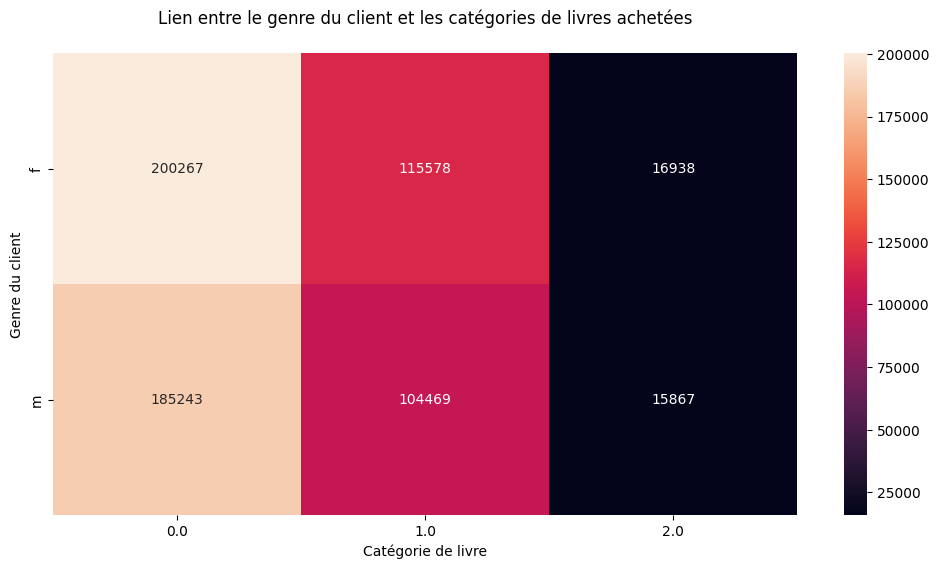

In [63]:
plt.figure(figsize = (12, 6))
sns.heatmap(table_de_contingence_1, annot = True, fmt = "d")
plt.xlabel("Catégorie de livre")
plt.ylabel("Genre du client")
plt.title("Lien entre le genre du client et les catégories de livres achetées\n")
plt.show()

### Lien entre l'âge des clients et la catégorie de livre achetée

In [64]:
print("Hypothèses du test de Kruskal-Wallis :\n")
print("Hypothèse nulle :  Les médianes des groupes sont égales, donc il n'y a pas de différence significative entre les groupes (et donc aucune influence de l'âge sur la catégorie de livre achetée).\n") 
print("Hypothèse alternative : Les médianes des groupes diffèrent, donc il y a une influence de l'âge sur la catégorie de livres achetée.\n\n")

age_par_categorie = [fusion_2[fusion_2["categ"] == categorie]["age"] for categorie in fusion_2["categ"].unique()]
statistique_kruskal, p_value_kruskal = kruskal(*age_par_categorie)

print("Test de Kruskal-Wallis :\n")
print(f"Statistique H = {statistique_kruskal}\n")
print(f"p-value = {p_value_kruskal}\n")

if p_value_kruskal < 0.05:
    print("L'âge du client a une importance quant à la catégorie de livre achetée.")
else:
    print("L'âge n'a pas d'importance quant à la catégorie de livre achetée.")

Hypothèses du test de Kruskal-Wallis :

Hypothèse nulle :  Les médianes des groupes sont égales, donc il n'y a pas de différence significative entre les groupes (et donc aucune influence de l'âge sur la catégorie de livre achetée).

Hypothèse alternative : Les médianes des groupes diffèrent, donc il y a une influence de l'âge sur la catégorie de livres achetée.


Test de Kruskal-Wallis :

Statistique H = 71192.65280541095

p-value = 0.0

L'âge du client a une importance quant à la catégorie de livre achetée.


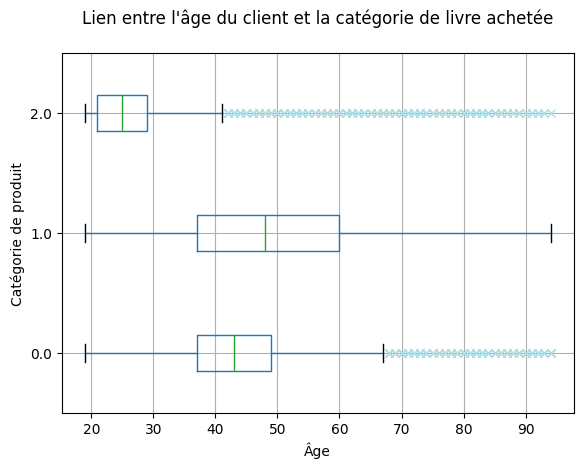

In [65]:
fusion_2.boxplot(column = "age", by = "categ", vert = False, flierprops = {"marker": "x", "markerfacecolor": "powderblue", "markeredgecolor": "powderblue"})
plt.xlabel("Âge")
plt.ylabel("Catégorie de produit")
plt.title("Lien entre l\'âge du client et la catégorie de livre achetée\n")
plt.suptitle("")
plt.show()

### Lien entre l'âge des clients et le montant total des achats

In [66]:
clients_19 = fusion_2[fusion_2["age"] == 19]
clients_19.shape

(15445, 12)

In [67]:
print("Hypothèses de l'ANOVA :\n")
print("Hypothèse nulle :  Les moyennes des groupes sont égales, donc il n'y a pas de différence significative entre les groupes d'âge.\n") 
print("Hypothèse alternative : Au moins une des moyennes des groupes d'âge diffère, donc il y a une différence significative entre les groupes d'âges.\n\n")

intervalle_age_ANOVA = [20, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 95]
libelles_groupes_ANOVA = ["20-24 ans", "25-29 ans", "30-34 ans", "35-39 ans", "40-44 ans", "45-49 ans", "50-54 ans", "55-59 ans", "60-64 ans", "65-69 ans", "70-74 ans", "75+ ans"]
fusion_2["age_group"] = pd.cut(fusion_2["age"], bins = intervalle_age_ANOVA, labels = libelles_groupes_ANOVA)

groupe_1_ANOVA = fusion_2[fusion_2["age_group"] == "20-24 ans"]["price"]
groupe_2_ANOVA = fusion_2[fusion_2["age_group"] == "25-29 ans"]["price"]
groupe_3_ANOVA = fusion_2[fusion_2["age_group"] == "30-34 ans"]["price"]
groupe_4_ANOVA = fusion_2[fusion_2["age_group"] == "35-39 ans"]["price"]
groupe_5_ANOVA = fusion_2[fusion_2["age_group"] == "40-44 ans"]["price"]
groupe_6_ANOVA = fusion_2[fusion_2["age_group"] == "45-49 ans"]["price"]
groupe_7_ANOVA = fusion_2[fusion_2["age_group"] == "50-54 ans"]["price"]
groupe_8_ANOVA = fusion_2[fusion_2["age_group"] == "55-59 ans"]["price"]
groupe_9_ANOVA = fusion_2[fusion_2["age_group"] == "60-64 ans"]["price"]
groupe_10_ANOVA = fusion_2[fusion_2["age_group"] == "65-69 ans"]["price"]
groupe_11_ANOVA = fusion_2[fusion_2["age_group"] == "70-74 ans"]["price"]
groupe_12_ANOVA = fusion_2[fusion_2["age_group"] == "75+ ans"]["price"]

statistique_ANOVA, p_value_ANOVA = f_oneway(groupe_1_ANOVA, groupe_2_ANOVA, groupe_3_ANOVA, groupe_4_ANOVA, groupe_5_ANOVA, groupe_6_ANOVA, groupe_7_ANOVA, groupe_8_ANOVA, groupe_9_ANOVA, groupe_10_ANOVA, groupe_11_ANOVA, groupe_12_ANOVA)

if p_value_ANOVA < 0.05:
    print("Il existe des différences significatives entre les groupes d'âges en termes de montant total des achats.")
else:
    print("Il n'existe pas de différence significative entre les groupes d'âges.")

Hypothèses de l'ANOVA :

Hypothèse nulle :  Les moyennes des groupes sont égales, donc il n'y a pas de différence significative entre les groupes d'âge.

Hypothèse alternative : Au moins une des moyennes des groupes d'âge diffère, donc il y a une différence significative entre les groupes d'âges.


Il existe des différences significatives entre les groupes d'âges en termes de montant total des achats.


Hypothèses de la régression linéaire :

Hypothèse nulle : Il n'y a pas de relation linéaire significative entre l'âge des clients et le montant total de leurs achats pour chaque groupe d'âge.

Hypothèse alternative : Il existe une relation linéaire significative entre l'âge des clients et le montant total de leurs achats pour chaque groupe d'âge




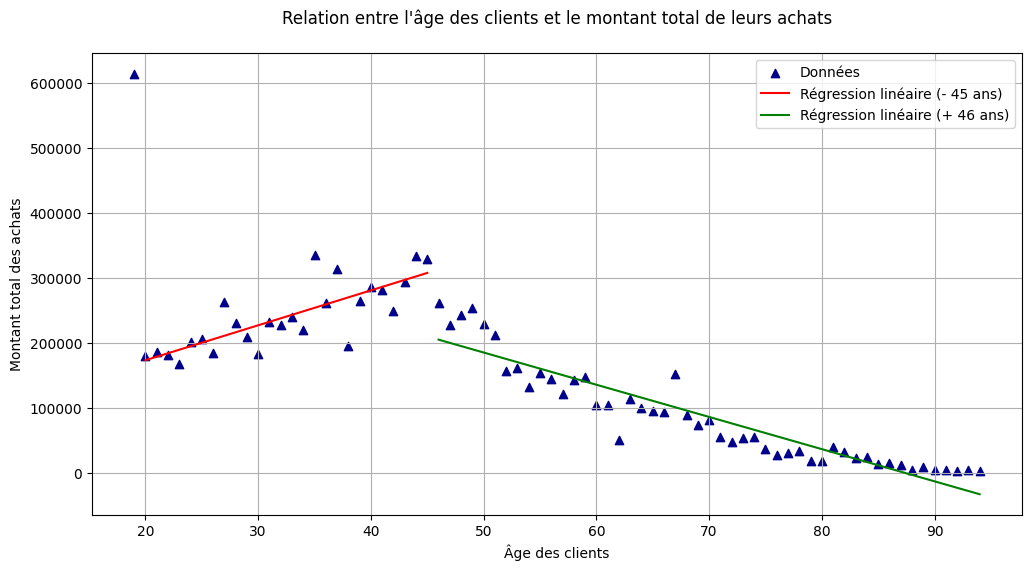

In [68]:
print("Hypothèses de la régression linéaire :\n")
print("Hypothèse nulle : Il n'y a pas de relation linéaire significative entre l'âge des clients et le montant total de leurs achats pour chaque groupe d'âge.\n") 
print("Hypothèse alternative : Il existe une relation linéaire significative entre l'âge des clients et le montant total de leurs achats pour chaque groupe d'âge\n\n")

depenses_par_age = fusion_2.groupby("age")["price"].sum().reset_index()
x = depenses_par_age["age"]
y = depenses_par_age["price"]
group1_RL = depenses_par_age[(depenses_par_age["age"] >= 20) & (depenses_par_age["age"] <= 45.2)]
group2_RL = depenses_par_age[(depenses_par_age["age"] >= 45.21) & (depenses_par_age["age"] <= 94)]
coefficient1 = np.polyfit(group1_RL["age"], group1_RL["price"], 1)
coefficient2 = np.polyfit(group2_RL["age"], group2_RL["price"], 1)
p1_RL = np.poly1d(coefficient1)
p2_RL = np.poly1d(coefficient2)

plt.figure(figsize = (12, 6))
plt.scatter(x, y, color = "darkblue", marker = "^", label = "Données")
plt.plot(group1_RL["age"], p1_RL(group1_RL["age"]), color = "red", label = "Régression linéaire (- 45 ans)")
plt.plot(group2_RL["age"], p2_RL(group2_RL["age"]), color = "green", label = "Régression linéaire (+ 46 ans)")
plt.xlabel("Âge des clients")
plt.ylabel("Montant total des achats")
plt.title("Relation entre l'âge des clients et le montant total de leurs achats\n")
plt.grid(True)
plt.legend()
plt.show()

### Lien entre l'âge des clients et la fréquence d'achat

In [69]:
transactions_2022 = fusion_2[fusion_2["date"].dt.year == 2022]
frequence_achat_2022 = transactions_2022.groupby("client_id").size().reset_index(name = "nombre_transactions")
jours_2022 = (transactions_2022["date"].max() - transactions_2022["date"].min()).days
frequence_achat_2022["frequence_achat"] = frequence_achat_2022["nombre_transactions"] / jours_2022
frequence_age_data = pd.merge(frequence_achat_2022[["client_id", "frequence_achat"]], fusion_2[["client_id", "age"]], on = "client_id").drop_duplicates(subset = "client_id")

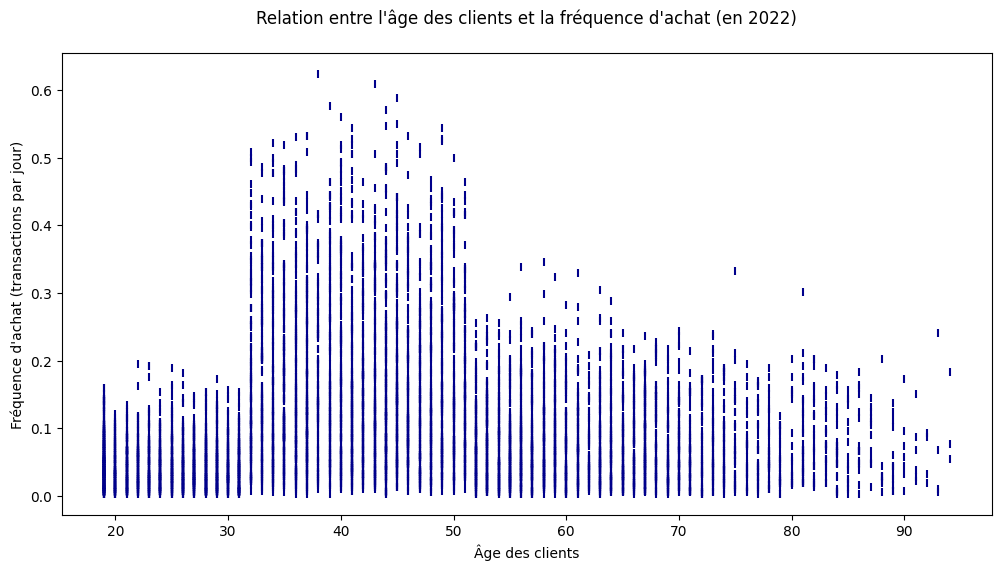

In [70]:
plt.figure(figsize = (12, 6))
ax = plt.gca()
ax.scatter(frequence_age_data["age"], frequence_age_data["frequence_achat"], color = "darkblue", marker = "|")
plt.title("Relation entre l'âge des clients et la fréquence d'achat (en 2022)\n")
plt.xlabel("Âge des clients")
plt.ylabel("Fréquence d'achat (transactions par jour)")
plt.show()

In [71]:
print("Hypothèses du test de Spearman :\n")
print("Hypothèse nulle : Les deux variables sont indépendantes l'une de l'autre, donc il n'y a pas de corrélation monotone significative entre elles.\n") 
print("Hypothèse alternative : Il existe une corrélation monotone significative entre les deux variables, soit positive, soit négative\n\n")

age_freq = frequence_age_data["age"]
achat_freq = frequence_age_data["frequence_achat"]
corr_spearman, p_value_spearman = spearmanr(age_freq, achat_freq)

print(f"Corrélation de Spearman : {corr_spearman}\n")
print(f"p_value : {p_value_spearman}\n")

if p_value_spearman < 0.05:
    print("La corrélation est statistiquement significative entre l'âge des clients et la fréquence d'achat.")
    if corr_spearman > 0:
        print("Et il y a une corrélation positive entre les deux.")
    else:
        print("Et il y a une corrélation négative entre les deux.")
else:
    print("La corrélation n'est pas statistiquement significative entre l'âge des clients et la fréquence d'achat.")

Hypothèses du test de Spearman :

Hypothèse nulle : Les deux variables sont indépendantes l'une de l'autre, donc il n'y a pas de corrélation monotone significative entre elles.

Hypothèse alternative : Il existe une corrélation monotone significative entre les deux variables, soit positive, soit négative


Corrélation de Spearman : 0.12220572398423332

p_value : 1.1504086343745892e-29

La corrélation est statistiquement significative entre l'âge des clients et la fréquence d'achat.
Et il y a une corrélation positive entre les deux.


### Lien entre l'âge des clients et la taille du panier moyen

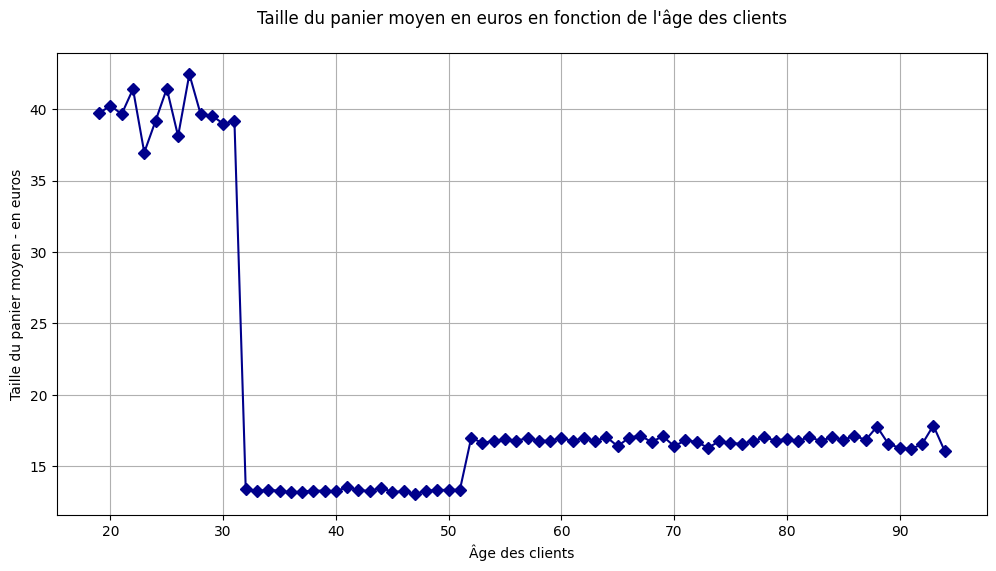

In [72]:
panier_moyen_prix = fusion_2.groupby("age")["price"].mean()
plt.figure(figsize = (12, 6))
plt.plot(panier_moyen_prix.index, panier_moyen_prix.values, marker = "D", color = "darkblue")
plt.title("Taille du panier moyen en euros en fonction de l\'âge des clients\n")
plt.xlabel("Âge des clients")
plt.ylabel("Taille du panier moyen - en euros")
plt.grid(True)
plt.show()

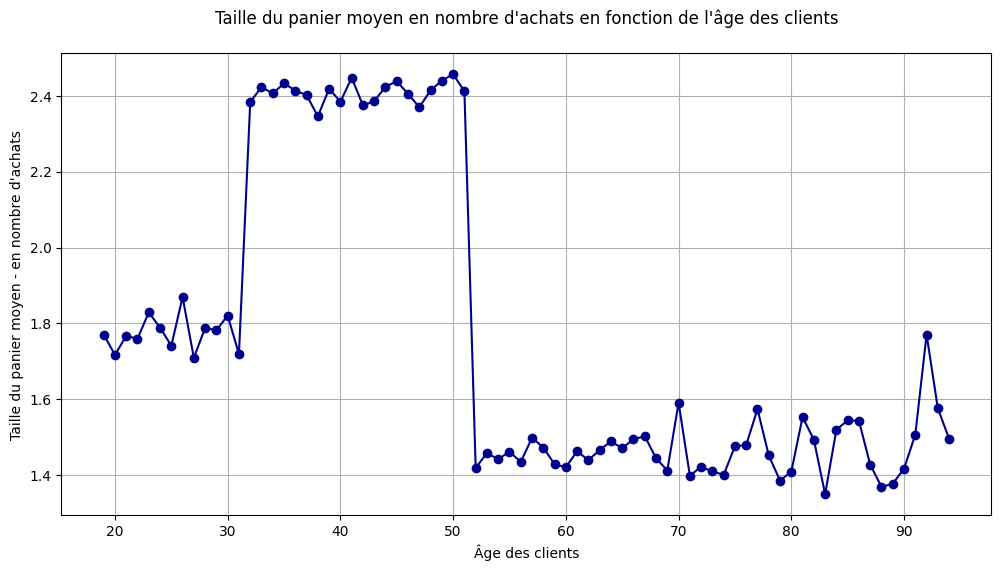

In [73]:
panier_moyen_nb_achats = fusion_2.groupby("age")["id_prod"].count() / fusion_2.groupby("age")["session_id"].nunique()
plt.figure(figsize = (12, 6))
plt.plot(panier_moyen_nb_achats.index, panier_moyen_nb_achats.values, marker = "o", color = "darkblue")
plt.title("Taille du panier moyen en nombre d\'achats en fonction de l\'âge des clients\n")
plt.xlabel("Âge des clients")
plt.ylabel("Taille du panier moyen - en nombre d\'achats")
plt.grid(True)
plt.show()

In [74]:
print("Hypothèses du test de Kendall :\n")
print("Hypothèse nulle : Les deux variables sont indépendantes, donc il n'y a pas de corrélation entre les deux variables.\n") 
print("Hypothèse alternative : Il existe une corrélation significative entre les deux variables, soit positive, soit négative\n\n")

ages_clients = fusion_2.groupby("client_id")["age"].first()
taille_panier_moyen = fusion_2.groupby("client_id")["price"].mean()
donnees_correlation = pd.merge(ages_clients, taille_panier_moyen, on = "client_id", how = "inner")
corr_kendall, p_value_kendall = kendalltau(donnees_correlation["age"], donnees_correlation["price"])

print(f"Corrélation de Kendall : {corr_kendall}\n")
print(f"p-value : {p_value_kendall}\n")

if p_value_kendall < 0.05:
    print("La corrélation est statistiquement significative entre l'âge des clients et la taille du panier moyen en euros.")
    if corr_kendall > 0:
        print("Et il y a une corrélation positive entre les deux.")
    elif corr_kendall < 0:
        print("Et il y a une corrélation négative entre les deux.")
    else:
        print("Et il y a une corrélation nulle entre les deux.")
else:
    print("La corrélation n'est pas statistiquement significative entre l'âge des clients et la taille du panier moyen en euros.")

Hypothèses du test de Kendall :

Hypothèse nulle : Les deux variables sont indépendantes, donc il n'y a pas de corrélation entre les deux variables.

Hypothèse alternative : Il existe une corrélation significative entre les deux variables, soit positive, soit négative


Corrélation de Kendall : -0.16979271457299341

p-value : 7.265281391203806e-121

La corrélation est statistiquement significative entre l'âge des clients et la taille du panier moyen en euros.
Et il y a une corrélation négative entre les deux.
